In [36]:
import rdkit
from rdkit import Chem
from rdkit.Chem import AllChem
from pathlib import Path
from pprint import pprint


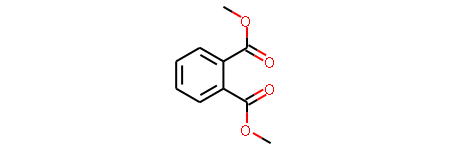

In [37]:
mol = [rdkit.Chem.MolFromMolFile(str(p)) for p in list(Path("../qmkit/data").glob("*.mol"))][0]
mol

In [109]:
def confgen(mol, n_conf, rms, n_jobs=0):
    AllChem.AddHs(mol)
    AllChem.Compute2DCoords(mol)
    
    num_of_confs = []
    conf_ids = AllChem.EmbedMultipleConfs(mol, numConfs=n_conf,
                                   pruneRmsThresh=rms,
                                   numThreads=n_jobs)
    return mol, list(conf_ids)

def write_to_sdf(mol, confIds, filename="../tmp.sdf"):
    writer = Chem.SDWriter(filename)
    for confID in confIds:
        writer.write(mol, confId=confID)
    writer.close()


#mol = [rdkit.Chem.MolFromMolFile(str(p)) for p in list(Path("../qmkit/data").glob("*.mol"))][0]
#mol = Chem.MolFromSmiles("CC(=O)NCCC1=CNc2c1cc(OC)cc2")
mol = Chem.MolFromSmiles("CC(=O)OCCC(/C)=C\C[C@H](C(C)=C)CCC=C")
mol, conf_ids = confgen(mol, 100, rms=1)
for ids in conf_ids:
    pass
    #pprint(Chem.MolToMolBlock(mol, confId=ids))
print(len(conf_ids))
write_to_sdf(mol, conf_ids)

68


In [93]:
from pprint import pprint
for conf in confs:
    pprint(Chem.MolToMolBlock(conf))

('\n'
 '     RDKit          3D\n'
 '\n'
 ' 18 17  0  0  0  0  0  0  0  0999 V2000\n'
 '    4.5925    2.8268   -0.3783 C   0  0  0  0  0  0  0  0  0  0  0  0\n'
 '    3.5076    1.8295   -0.6104 C   0  0  0  0  0  0  0  0  0  0  0  0\n'
 '    2.3018    2.1262   -0.7159 O   0  0  0  0  0  0  0  0  0  0  0  0\n'
 '    3.8695    0.5093   -0.7123 O   0  0  0  0  0  0  0  0  0  0  0  0\n'
 '    3.0177   -0.5606   -0.9257 C   0  0  0  0  0  0  0  0  0  0  0  0\n'
 '    1.9657   -0.7571    0.1173 C   0  0  0  0  0  0  0  0  0  0  0  0\n'
 '    1.1537   -1.9313   -0.2653 C   0  0  0  0  0  0  0  0  0  0  0  0\n'
 '    1.7870   -3.2654   -0.4158 C   0  0  0  0  0  0  0  0  0  0  0  0\n'
 '   -0.1402   -1.7614   -0.4678 C   0  0  0  0  0  0  0  0  0  0  0  0\n'
 '   -0.8372   -0.4693   -0.3373 C   0  0  0  0  0  0  0  0  0  0  0  0\n'
 '   -1.9745   -0.7441    0.8543 C   0  0  2  0  0  0  0  0  0  0  0  0\n'
 '   -2.7046   -1.8931    0.0642 C   0  0  0  0  0  0  0  0  0  0  0  0\n'
 '   -2.2152   

In [57]:

mol.GetNumConformers()

4